# This notebook implements code to fetch noise profile from a fake backend

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator

import rustworkx as rx
from rustworkx.visualization import mpl_draw

import numpy as np

from optimized_routing.utils.backend_info import get_qubit_noise_from_backend, get_coupling_map_from_backend

## Connect to a fake backend with AerSimulator

In [12]:
# Need to do only once

#service = QiskitRuntimeService.save_account(
#    channel='ibm_quantum',
#    instance='ibm-q/open/main',
#    set_as_default=True,
#    overwrite=True,
#    token='<IBM Quantum API key>'
#)

In [13]:
service = QiskitRuntimeService()

/tmp/ipykernel_222359/1875822867.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


In [14]:
backend = service.backend('ibm_brisbane')

In [15]:
dev_list = service.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

In [16]:
print(dev_list)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]


In [17]:
# Select least busy backend
dev = service.least_busy(min_num_qubits=5, simulator=False, operational=True)
print(dev)

<IBMBackend('ibm_brisbane')>


In [18]:
seed_sim = 42
noisy_fake_backend = AerSimulator.from_backend(backend, seed_simulator=seed_sim)
print(noisy_fake_backend)

AerSimulator('aer_simulator_from(ibm_brisbane)'
             noise_model=<NoiseModel on ['ecr', 'sx', 'measure', 'id', 'x', 'reset']>)


## Construct hardware topology graph of the backend

In [19]:
G = get_coupling_map_from_backend(noisy_fake_backend)

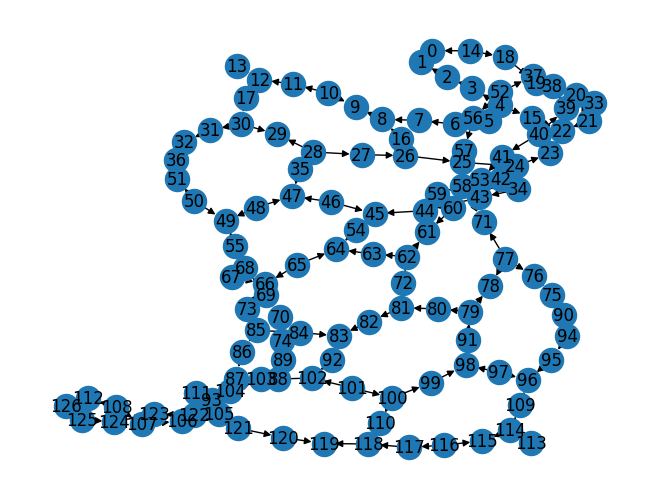

In [20]:
mpl_draw(G, with_labels=True)

## Noise profile of each qubit

In [21]:
from qiskit.visualization import plot_error_map

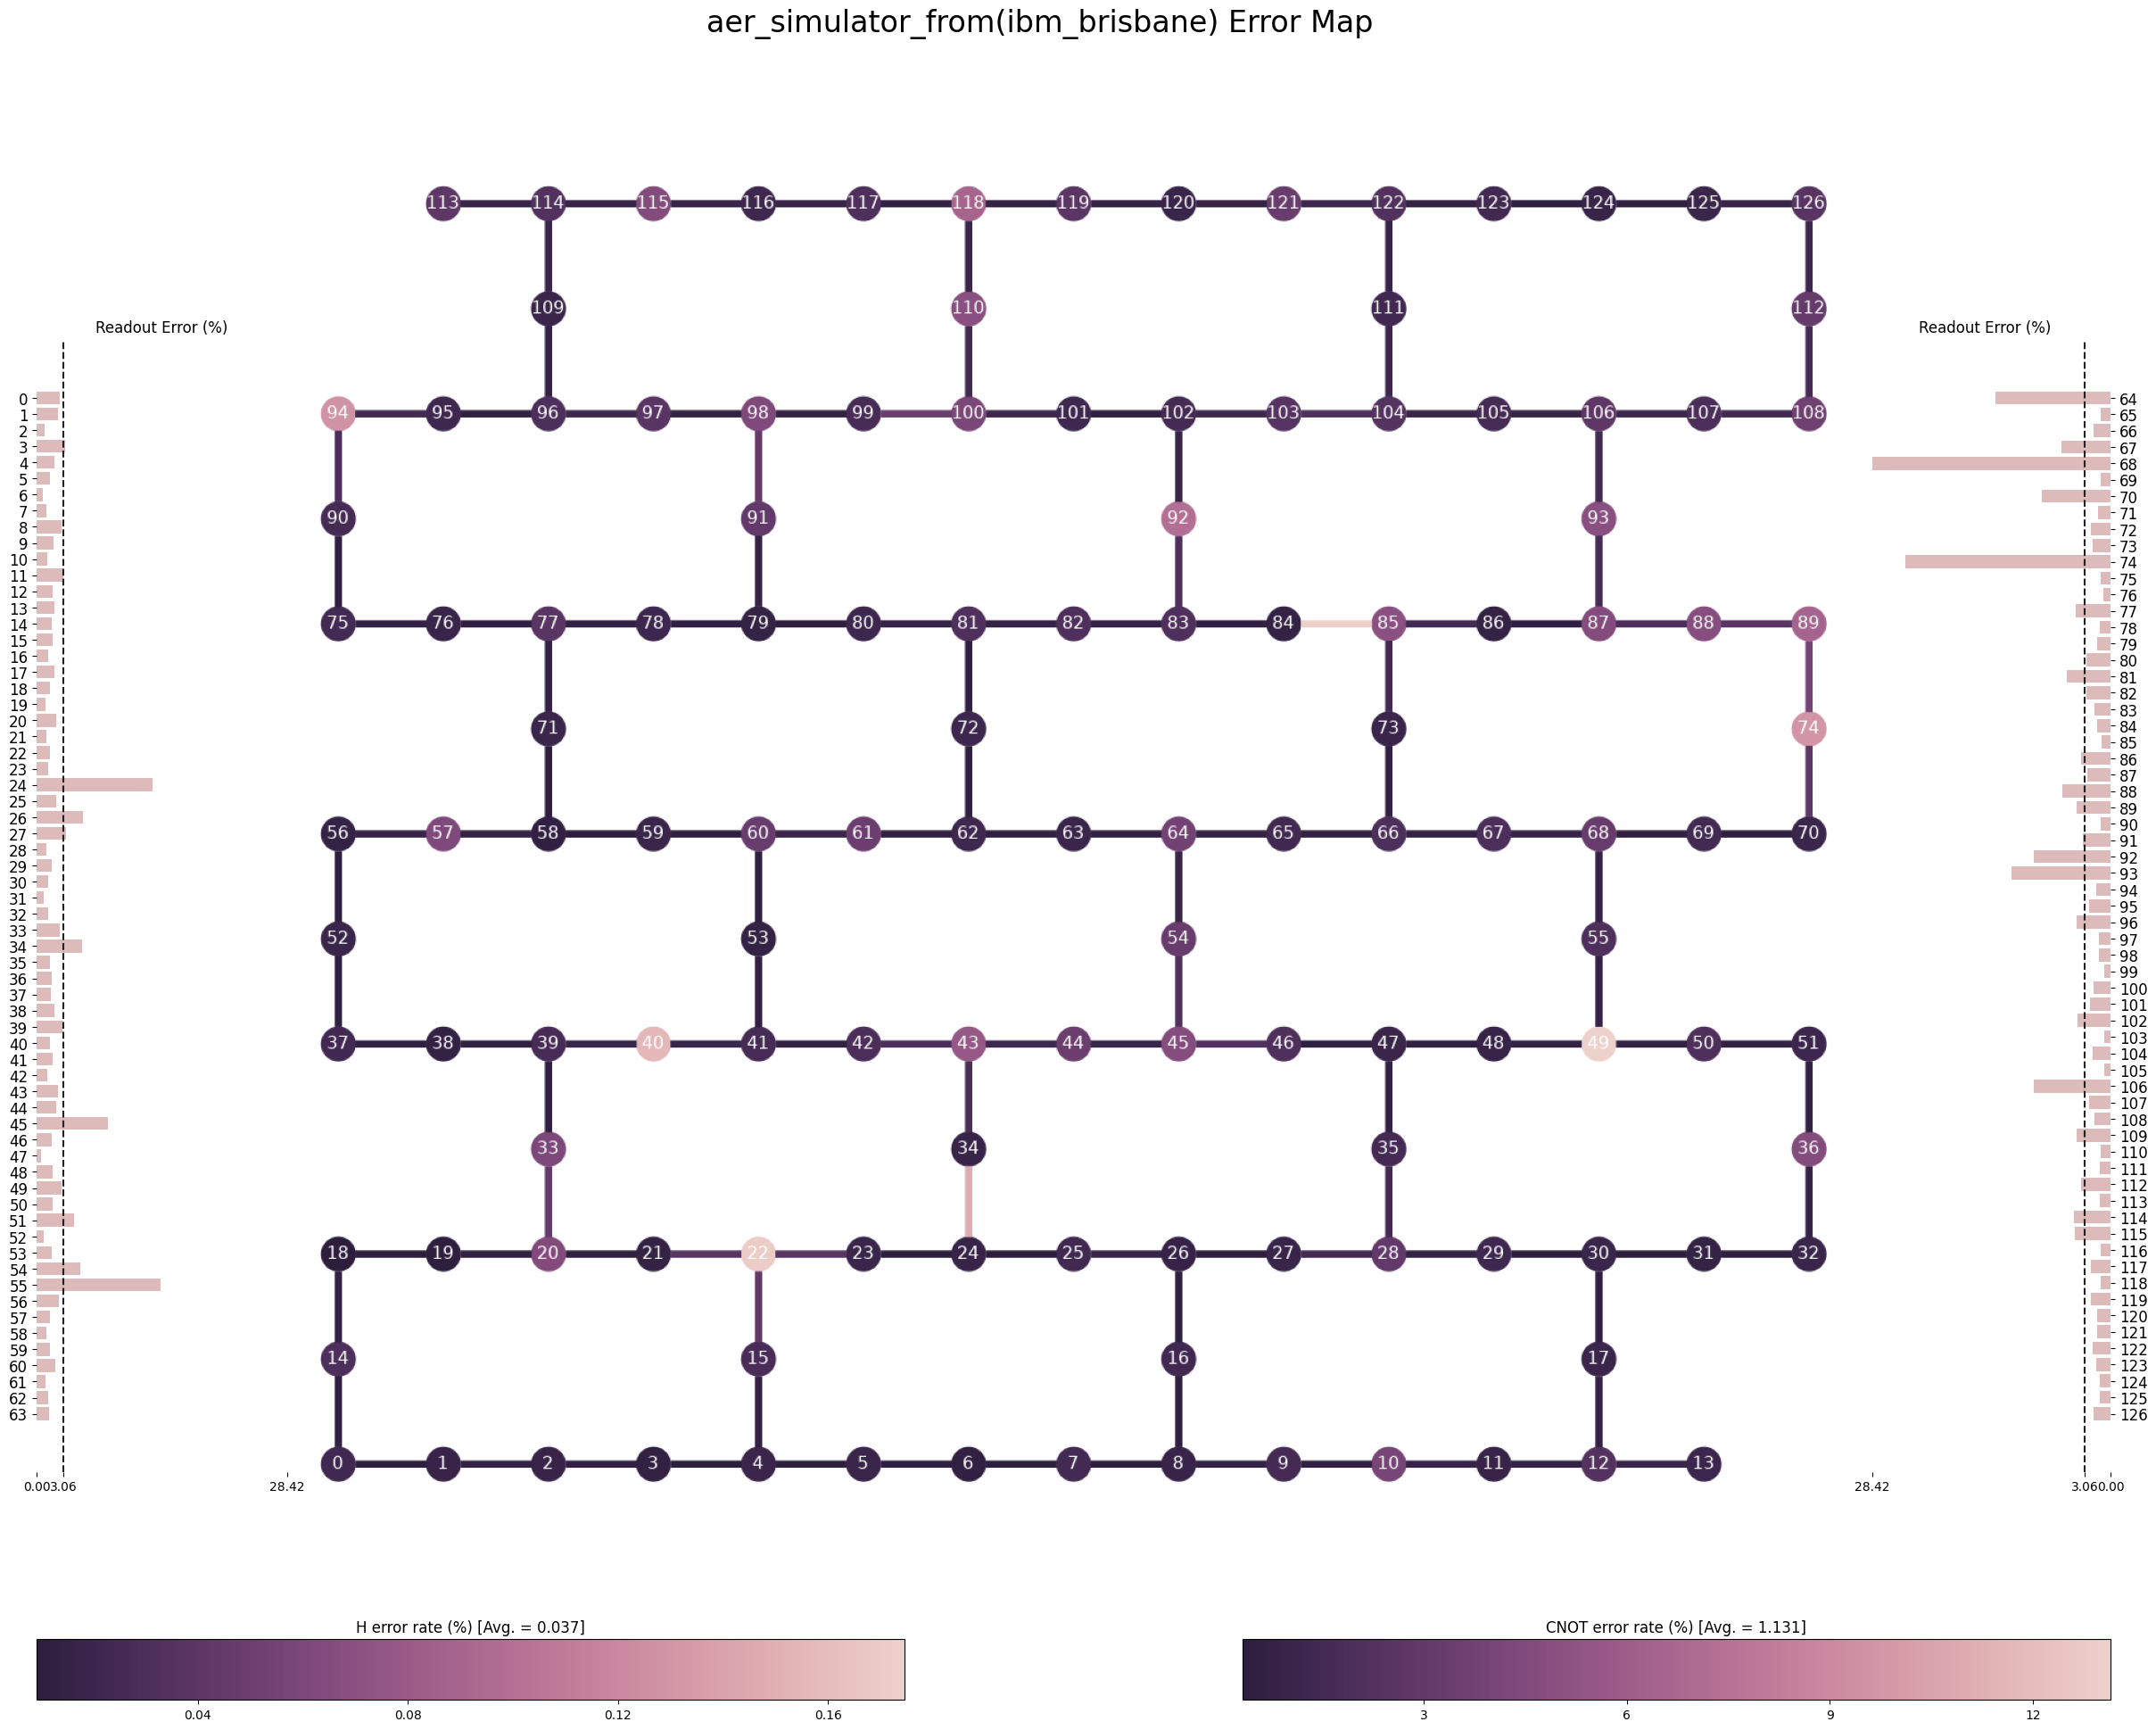

In [22]:
plot_error_map(noisy_fake_backend, figsize=(30, 24))

In [23]:
Noise_dict, _ = get_qubit_noise_from_backend(noisy_fake_backend)

In [24]:
print(Noise_dict)

{'0': 0.026611328125, '1': 0.024169921875, '2': 0.00927734375, '3': 0.0322265625, '4': 0.019775390625, '5': 0.014892578125, '6': 0.00732421875, '7': 0.010986328125, '8': 0.02880859375, '9': 0.01904296875, '10': 0.012451171875, '11': 0.0302734375, '12': 0.017822265625, '13': 0.02001953125, '14': 0.017578125, '15': 0.0185546875, '16': 0.013671875, '17': 0.019775390625, '18': 0.015380859375, '19': 0.009765625, '20': 0.022705078125, '21': 0.010986328125, '22': 0.015380859375, '23': 0.012939453125, '24': 0.1318359375, '25': 0.022216796875, '26': 0.052978515625, '27': 0.033203125, '28': 0.01123046875, '29': 0.017333984375, '30': 0.013671875, '31': 0.008544921875, '32': 0.013427734375, '33': 0.026123046875, '34': 0.052001953125, '35': 0.014892578125, '36': 0.01708984375, '37': 0.0166015625, '38': 0.020263671875, '39': 0.029296875, '40': 0.014892578125, '41': 0.0185546875, '42': 0.012451171875, '43': 0.02392578125, '44': 0.0224609375, '45': 0.0810546875, '46': 0.01708984375, '47': 0.0048828125

## Rough work

In [8]:
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins

In [9]:
list_stage_plugins("routing")

['basic', 'default', 'lookahead', 'none', 'sabre']

In [10]:
list_stage_plugins("layout")

['default', 'dense', 'sabre', 'trivial']